## Pendahuluan

Metode bagi dua (*bisection*) merupakan salah satu metode numerik untuk menemukan akar (*root* atau solusi) dari persamaan nonlinear, yaitu nilai $ x $ sehingga $ f(x) = 0 $. Metode ini didasarkan pada "teorema nilai tengah" (*mean value theorem*) yang menyatakan bahwa jika suatu fungsi kontinu berubah tanda antara dua titik $ a $ dan $ b $ (yakni $ f(a) \cdot f(b) < 0 $), maka pasti terdapat setidaknya satu akar di antara $ a $ dan $ b $. Metode ini populer karena kesederhanaannya serta jaminan konvergensi selama kondisi tersebut terpenuhi.

## Algoritma Metode Bagi Dua

1. **Validasi Awal:**  
   - Periksa apakah $ f(a) \cdot f(b) < 0 $. Jika tidak, tampilkan pesan bahwa metode tidak dapat digunakan karena fungsi tidak menunjukkan perubahan tanda pada interval tersebut.

2. **Iterasi Perhitungan Titik Tengah:**  
   - Lakukan perulangan sebanyak `max_iter` (jumlah iterasi maksimum).
   - Pada setiap iterasi, hitung titik tengah $ c = \frac{a+b}{2} $.

3. **Pengecekan Kriteria Konvergensi:**  
   - Periksa apakah nilai absolut $ |f(c)| $ sudah lebih kecil dari toleransi `tol` atau panjang interval $\frac{b-a}{2}$ sudah cukup kecil.
   - Jika salah satu kondisi terpenuhi, maka $ c $ dianggap sebagai akar dan algoritma mengembalikan nilai tersebut.

4. **Pemisahan Interval:**  
   - Jika $ f(a) \cdot f(c) < 0 $, berarti akar terdapat pada interval $[a, c]$, sehingga perbarui $ b = c $.
   - Jika tidak, berarti akar terdapat pada interval $[c, b]$, sehingga perbarui $ a = c $.

5. **Pengembalian Hasil:**  
   - Setelah iterasi selesai atau kondisi konvergensi terpenuhi, kembalikan nilai $ c $ atau nilai tengah dari interval terakhir $(a+b)/2$ sebagai pendekatan akar.

### *Pseudocode*

```markdown
input f, a, b, tolerance, max_iter
output root
algorithm bisection(f, a, b, tolerance, max_iter):
    if f(a) * f(b) >= 0 then
        print "Metode bagi dua tidak dapat diterapkan pada rentang (interval) ini."
        return None

    for i from 1 to max_iter do:
        c = (a + b) / 2
        if abs(f(c)) < tolerance or (b - a) / 2 < tolerance then:
            return c
        if f(a) * f(c) < 0 then:
            b = c
        else:
            a = c

    root = (a + b) / 2
    return root

```


## Implementasi dalam Python

Berikut adalah contoh implementasi metode bagi dua dalam Python dengan fungsi $ f(x) $ didefinisikan menggunakan `def`:

In [13]:
def bisection(f, a, b, tol=1e-6, max_iter=100):
    """
    Menemukan akar persamaan f(x) = 0 menggunakan metode bagi dua.

    Parameter:
    f       : fungsi yang akan dicari akarnya
    a, b    : interval awal, harus memenuhi f(a)*f(b) < 0
    tol     : toleransi kesalahan (default 1e-6)
    max_iter: jumlah iterasi maksimum (default 100)

    Output:
    c       : nilai aproksimasi akar atau None jika kondisi tidak terpenuhi.
    """
    if f(a) * f(b) >= 0:
        print("Bisection method tidak dapat digunakan pada interval ini.")
        return None

    for i in range(max_iter):
        c = (a + b) / 2.0
        if abs(f(c)) < tol or (b - a) / 2 < tol:
            return c
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2

# Contoh penggunaan fungsi bisection dengan f(x) = x^2 - 4
def func(x):
    return x**2 - 4

root = bisection(func, 0, 3)
print("Akar dari f(x) = x^2 - 4 adalah:", root)

Akar dari f(x) = x^2 - 4 adalah: 2.000000238418579


## Aplikasi Fisika

### 1. Penerapan pada Gerak Parabola

Misalkan kita ingin mencari waktu $ t $ ketika sebuah proyektil mencapai ketinggian tertentu $ h_{\text{target}} $. Persamaan ketinggian dalam gerak vertikal adalah:

$$
y(t) = v_0 t - \frac{1}{2} g t^2
$$

Untuk mencari $ t $ sehingga $ y(t) = h_{\text{target}} $, kita definisikan fungsi $ f(t) $ sebagai:

$$
f(t) = v_0 t - \frac{1}{2} g t^2 - h_{\text{target}}
$$

Implementasinya adalah sebagai berikut:

In [14]:
# Parameter gerak parabola
v0 = 20.0      # kecepatan awal (m/s)
g = 9.81       # percepatan gravitasi (m/s^2)
h_target = 15.0  # ketinggian target (m)

# Definisikan fungsi f(t) menggunakan def
def height_difference(t):
    return v0 * t - 0.5 * g * t**2 - h_target

# Pilih interval, misal antara t=0 dan t=v0/g (waktu mencapai puncak)
t_root = bisection(height_difference, 0, v0/g)
print("Waktu saat mencapai ketinggian", h_target, "m adalah t =", t_root, "detik")

Waktu saat mencapai ketinggian 15.0 m adalah t = 0.990717904404884 detik


### 2. Penerapan pada Sistem Pegas Nonlinear

Tinjau sebuah sistem dengan energi potensial pegas nonlinear:
$$
U(x) = \frac{1}{4} k x^4 - m g x
$$

Untuk menemukan posisi keseimbangan, kita mensyaratkan turunan $ \frac{dU}{dx} = 0 $, sehingga:

$$
f(x) = k x^3 - m g = 0
$$

Implementasinya sebagai berikut:

In [15]:
# Parameter sistem pegas non-linear
k = 10.0      # konstanta pegas (N/m^3)
m = 1.0       # massa (kg)
g = 9.81      # percepatan gravitasi (m/s^2)

# Definisikan fungsi f(x) menggunakan def
def force_balance(x):
    return k * x**3 - m * g

# Pilih interval yang tepat, misal [0, 2]
x_root = bisection(force_balance, 0, 2)
print("Posisi keseimbangan sistem pegas adalah x =", x_root, "meter")

Posisi keseimbangan sistem pegas adalah x = 0.993626594543457 meter


## Kelebihan dan Kekurangan Metode Bagi Dua

### Kelebihan
- **Kesederhanaan:**  
  Algoritma yang mudah dipahami dan diimplementasikan.
- **Jaminan Konvergensi:**  
  Jika syarat $ f(a) \cdot f(b) < 0 $ terpenuhi, metode ini akan selalu konvergen ke akar.
- **Stabilitas:**  
  Tidak membutuhkan turunan fungsi, sehingga cocok untuk fungsi-fungsi yang sulit diturunkan secara analitis.

### Kekurangan
- **Kecepatan Konvergensi:**  
  Konvergensi relatif lambat jika dibandingkan dengan metode lain seperti Newton-Raphson.
- **Keterbatasan Interval:**  
  Hanya dapat digunakan jika diketahui interval awal di mana fungsi berubah tanda.
- **Satu Akar Saja:**  
  Metode ini hanya menemukan satu akar dalam satu interval sehingga tidak efektif jika terdapat banyak akar dalam satu rentang nilai.

## Pengayaan: Melihat Proses Iterasi Bagi Dua

Dengan Python, kita dapat memvisualisasikan proses iterasi metode bagi dua sekaligus mencetak tabel yang berisi kolom-kolom iterasi seperti nilai a, b, c, dan f(c).

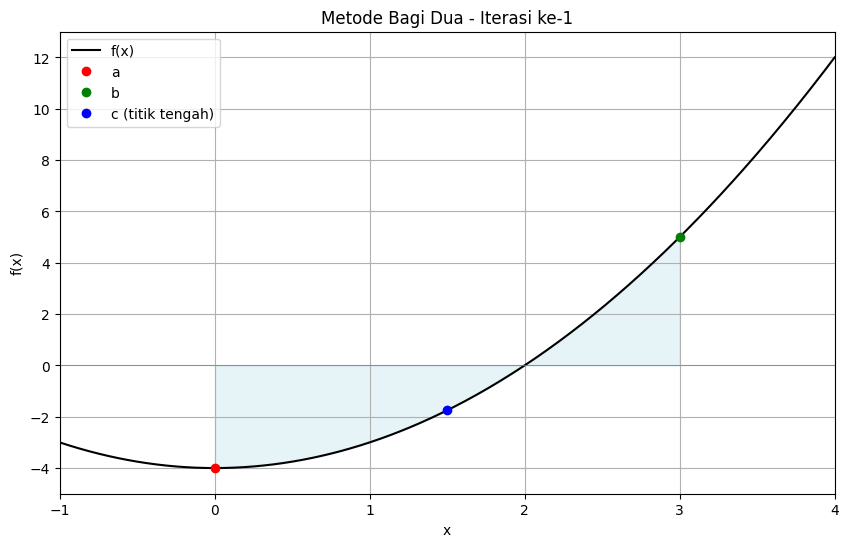

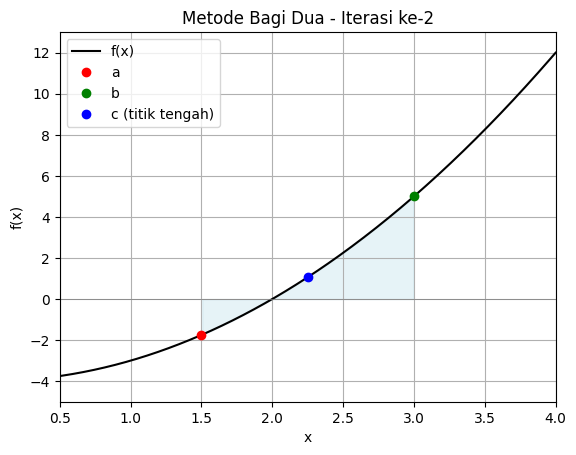

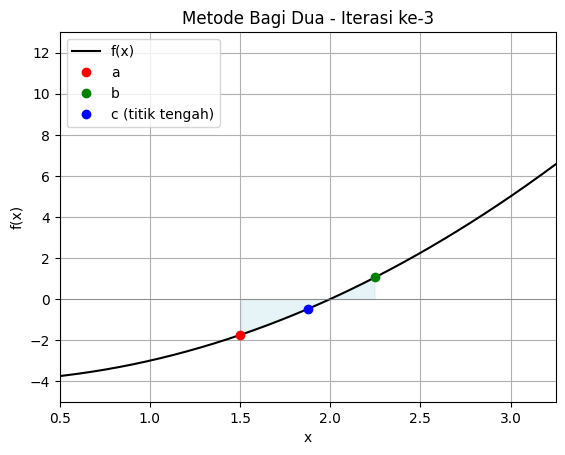

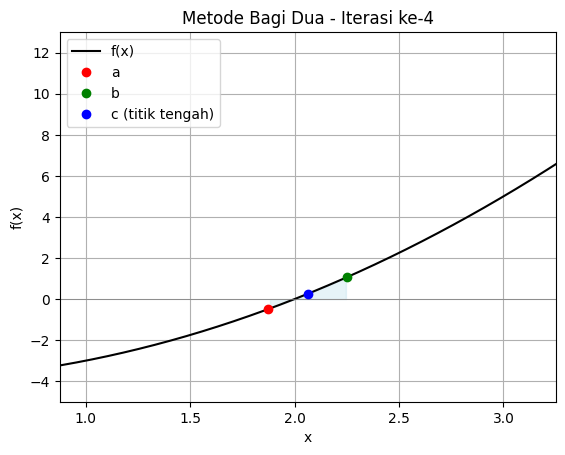

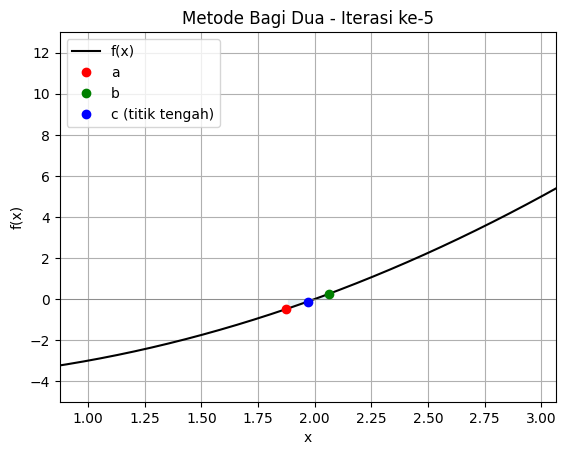

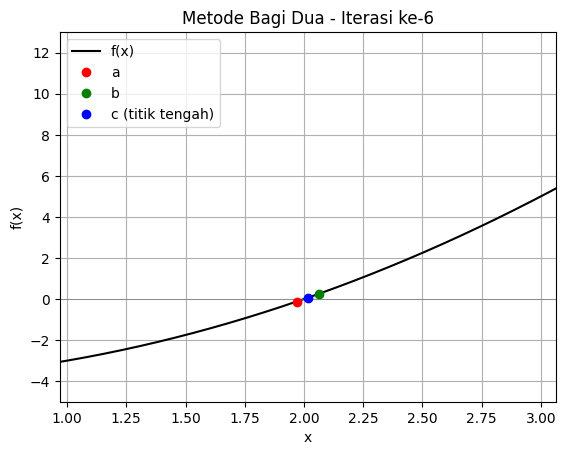

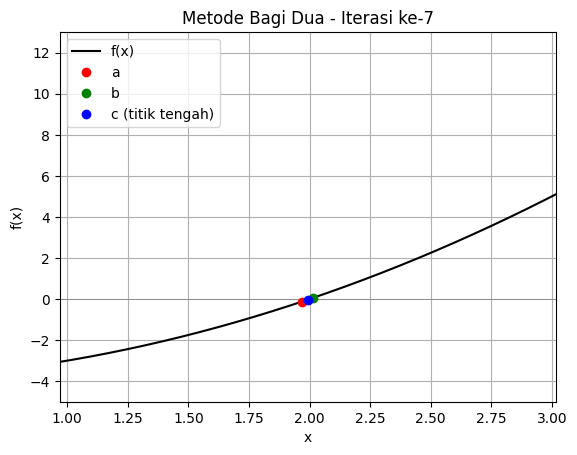

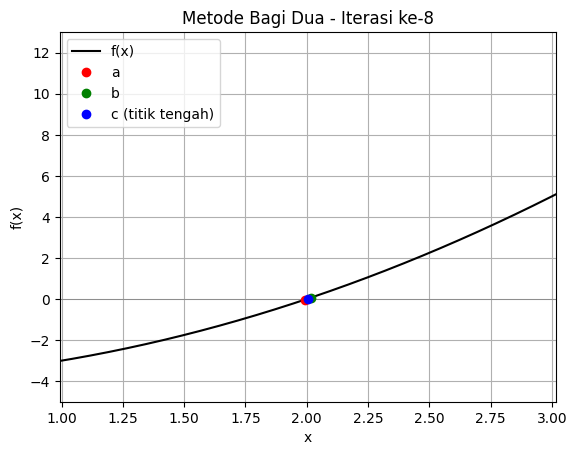

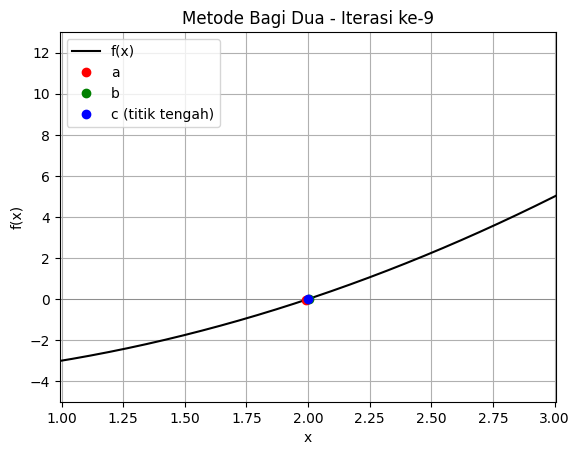

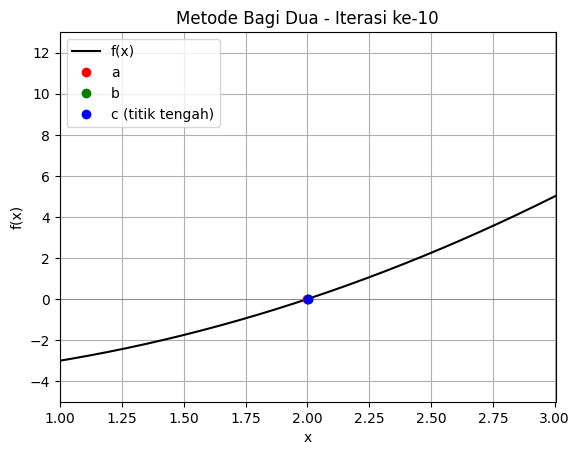

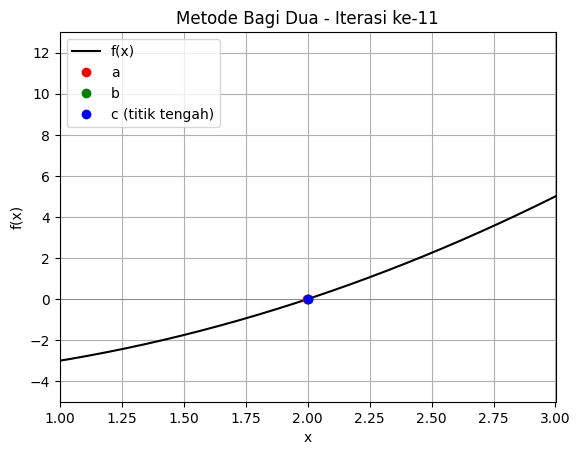

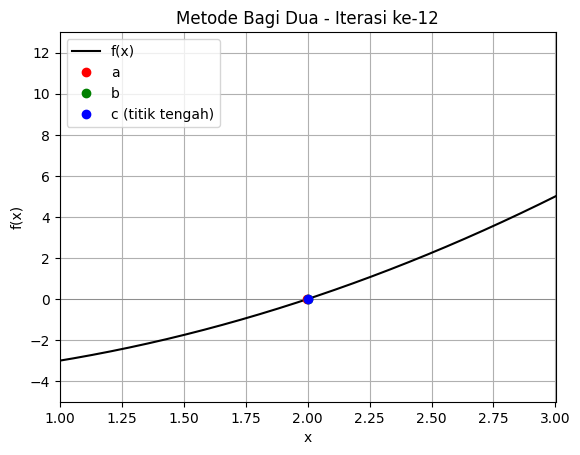

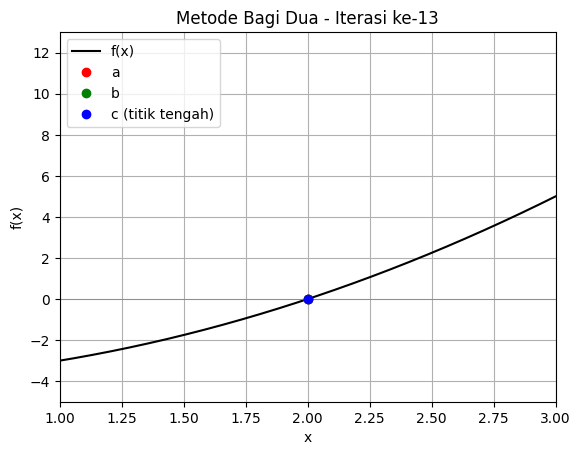

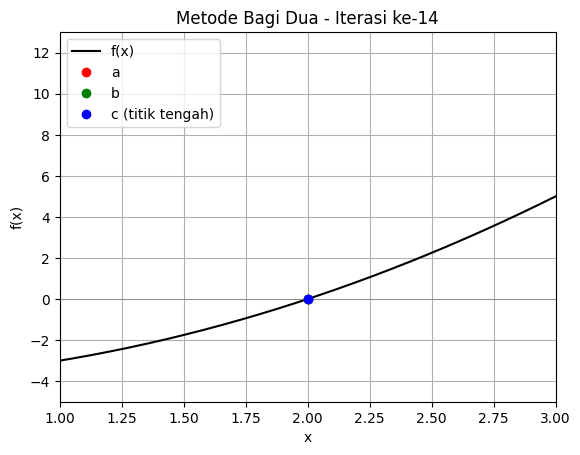

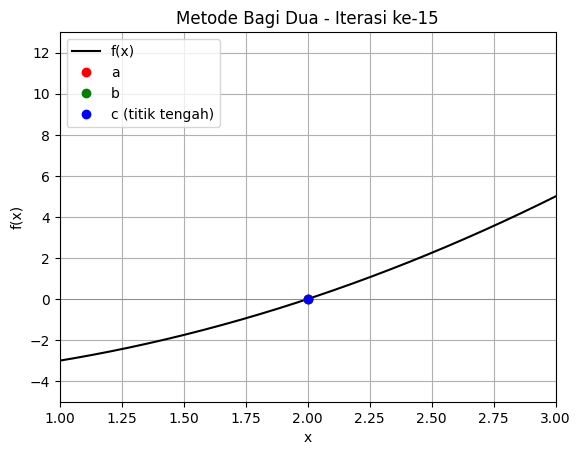

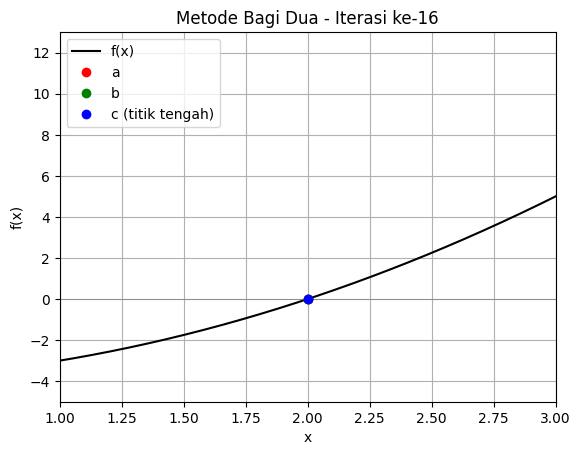

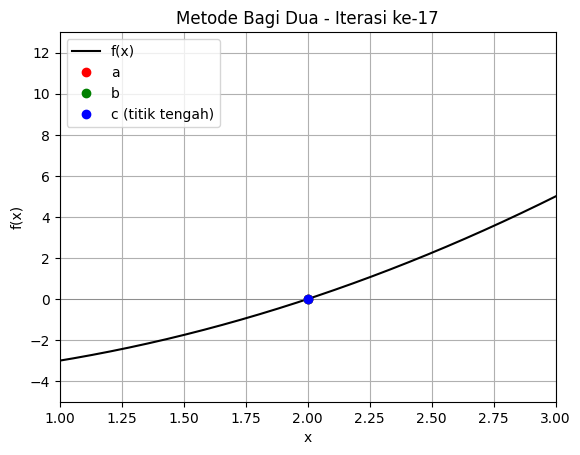

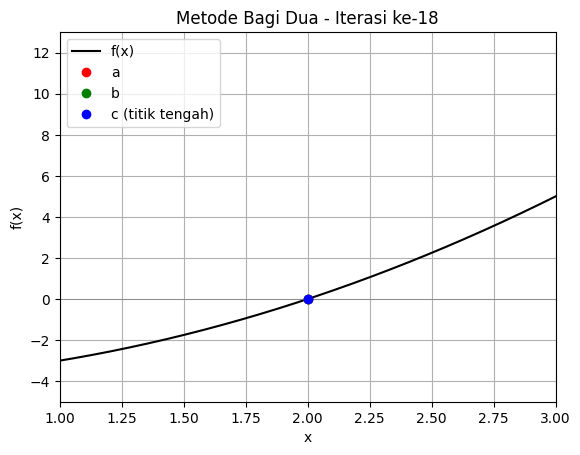

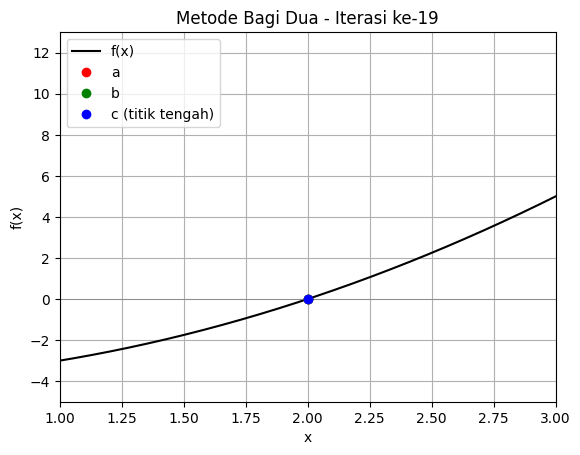

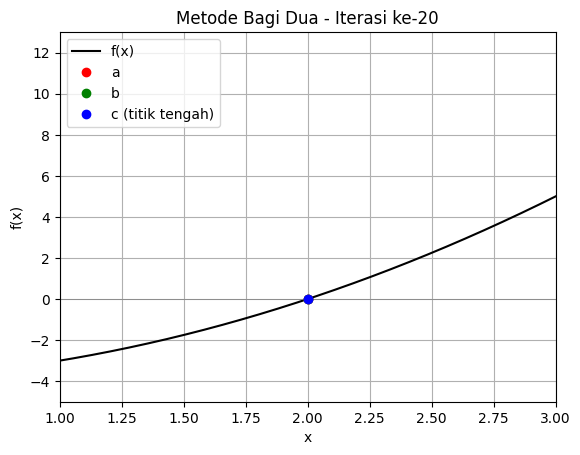

Iterasi    a            b            c            f(c)        
--------------------------------------------------------------
1          0.000000     3.000000     1.500000     -1.750000   
2          1.500000     3.000000     2.250000     1.062500    
3          1.500000     2.250000     1.875000     -0.484375   
4          1.875000     2.250000     2.062500     0.253906    
5          1.875000     2.062500     1.968750     -0.124023   
6          1.968750     2.062500     2.015625     0.062744    
7          1.968750     2.015625     1.992188     -0.031189   
8          1.992188     2.015625     2.003906     0.015640    
9          1.992188     2.003906     1.998047     -0.007809   
10         1.998047     2.003906     2.000977     0.003907    
11         1.998047     2.000977     1.999512     -0.001953   
12         1.999512     2.000977     2.000244     0.000977    
13         1.999512     2.000244     1.999878     -0.000488   
14         1.999878     2.000244     2.000061     0.000

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 - 4

def bisection_visual_table(f, a, b, tol=1e-6, max_iter=20):
    iteration_data = []  # Menyimpan data iterasi sebagai list (iterasi, a, b, c, f(c))
    
    # Buat rentang x untuk menggambarkan fungsi
    x_vals = np.linspace(a - 1, b + 1, 400)
    y_vals = f(x_vals)
    
    plt.figure(figsize=(10, 6))
    
    for i in range(max_iter):
        c = (a + b) / 2.0
        iteration_data.append((i+1, a, b, c, f(c)))
        plt.clf()  # Bersihkan plot untuk iterasi berikutnya
        
        # Gambar grafik fungsi f(x)
        plt.plot(x_vals, y_vals, 'k-', label='f(x)')
        plt.axhline(0, color='gray', lw=0.5)
        
        # Tandai titik a, b, dan c
        plt.plot(a, f(a), 'ro', label='a')
        plt.plot(b, f(b), 'go', label='b')
        plt.plot(c, f(c), 'bo', label='c (titik tengah)')
        
        # Highlight interval [a, b]
        plt.fill_between(x_vals, y_vals, where=(x_vals >= a) & (x_vals <= b), color='lightblue', alpha=0.3)
        
        plt.title(f"Metode Bagi Dua - Iterasi ke-{i+1}")
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.legend(loc='upper left')
        plt.grid(True)
        plt.xlim(a - 1, b + 1)
        plt.ylim(min(y_vals) - 1, max(y_vals) + 1)
        plt.pause(1)  # Jeda 1 detik per iterasi
        
        # Cek kriteria konvergensi
        if abs(f(c)) < tol or (b - a) / 2 < tol:
            print(f"Converged at iteration {i+1}")
            break
        
        # Update interval berdasarkan tanda f(c)
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
            
    plt.show()
    
    # Mencetak tabel iterasi
    header = "{:<10} {:<12} {:<12} {:<12} {:<12}".format("Iterasi", "a", "b", "c", "f(c)")
    print(header)
    print("-" * len(header))
    for data in iteration_data:
        iter_no, a_val, b_val, c_val, f_c_val = data
        print("{:<10d} {:<12.6f} {:<12.6f} {:<12.6f} {:<12.6f}".format(iter_no, a_val, b_val, c_val, f_c_val))
    return c

# Menjalankan visualisasi dan pencetakan tabel dengan interval awal [0, 3]
root = bisection_visual_table(f, 0, 3)
print("Solusi akar pendekatan:", root)